#### Proyecto I- Parte IV (Core)
* Análisis y Predicción de Ventas en una Tienda de Retail

In [10]:
# carga de datos y bibliotecas
from google.colab import drive

# se conecta colab con drive
drive.mount('/content/drive')
# Se importa biblioteca pandas

import pandas as pd
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Se carga la BDD
path = '/content/drive/MyDrive/DATA/retail_sales_dataset4.csv'
df = pd.read_csv(path)

In [17]:
df.head()

,Unnamed: 0,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,vtas_normalizada,ingreso_total,porcentaje_del_total,categoria,std_amount,std_med_grupo
0,0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.063291,456000,0.032895,Baja,456.0,-306.0
1,1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0.493671,456000,0.219298,Baja,456.0,544.0
2,2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.002532,456000,0.006579,Baja,456.0,-426.0
3,3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.240506,456000,0.109649,Baja,456.0,44.0
4,4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.037975,456000,0.021930,Baja,456.0,-356.0


In [18]:
# Se mofifica tipo de dato de columna date se cambia a tipo de dato datetime
df["date"] = pd.to_datetime(df["date"])

In [19]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_id        1000 non-null   int64         
 1   date                  1000 non-null   datetime64[ns]
 2   customer_id           1000 non-null   object        
 3   gender                1000 non-null   object        
 4   age                   1000 non-null   int64         
 5   product_category      1000 non-null   object        
 6   quantity              1000 non-null   int64         
 7   price_per_unit        1000 non-null   int64         
 8   total_amount          1000 non-null   int64         
 9   vtas_normalizada      1000 non-null   float64       
 10  ingreso_total         1000 non-null   int64         
 11  porcentaje_del_total  1000 non-null   float64       
 12  categoria             1000 non-null   object        
 13  std_amount         

In [21]:
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,vtas_normalizada,ingreso_total,porcentaje_del_total,categoria,std_amount,std_med_grupo
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.063291,456000,0.032895,Baja,456.0,-306.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0.493671,456000,0.219298,Baja,456.0,544.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.002532,456000,0.006579,Baja,456.0,-426.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.240506,456000,0.109649,Baja,456.0,44.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.037975,456000,0.021930,Baja,456.0,-356.0



* Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [22]:
df.describe().round(2)

,transaction_id,date,age,quantity,price_per_unit,total_amount,vtas_normalizada,ingreso_total,porcentaje_del_total,std_amount,std_med_grupo
count,1000.00,1000,1000.00,1000.00,1000.00,1000.0,1000.00,1000.0,1000.00,1000.0,1000.0
mean,500.50,2023-07-03 00:25:55.200000256,41.39,2.51,179.89,456.0,0.22,456000.0,0.10,456.0,0.0
min,1.00,2023-01-01 00:00:00,18.00,1.00,25.00,25.0,0.00,456000.0,0.01,456.0,-431.0
25%,250.75,2023-04-08 00:00:00,29.00,1.00,30.00,60.0,0.02,456000.0,0.01,456.0,-396.0
50%,500.50,2023-06-29 12:00:00,42.00,3.00,50.00,135.0,0.06,456000.0,0.03,456.0,-321.0
75%,750.25,2023-10-04 00:00:00,53.00,4.00,300.00,900.0,0.44,456000.0,0.20,456.0,444.0
max,1000.00,2024-01-01 00:00:00,64.00,4.00,500.00,2000.0,1.00,456000.0,0.44,456.0,1544.0
std,288.82,NaN,13.68,1.13,189.68,560.0,0.28,0.0,0.12,0.0,560.0


In [23]:
df["date"].std()

Timedelta('105 days 06:38:33.163228086')

* Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

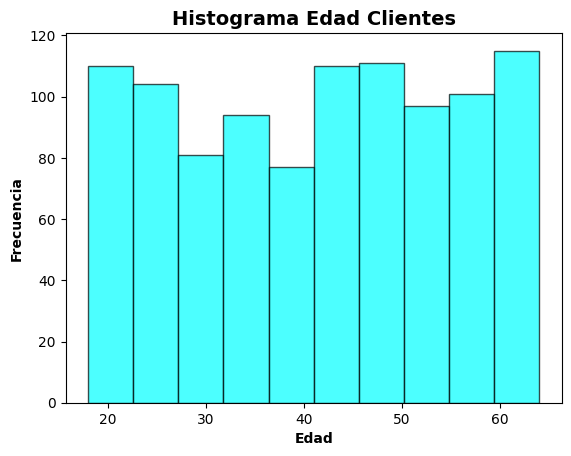

In [24]:
# Se crea gráfico histograma de la columna Edad.
plt.hist(df["age"], bins=10, color="cyan", edgecolor="black", alpha=0.7)
plt.title("Histograma Edad Clientes", fontsize=14, fontweight='bold')
plt.xlabel("Edad", fontweight='bold')
plt.ylabel("Frecuencia", fontweight='bold')
plt.show()

#### Rango de clientes entre 20 y 60 años
#### Clientes de 30 y 40 años tienen menos compras.
#### Los extremos con 20 y 50, 60 años, clientes con más compras.

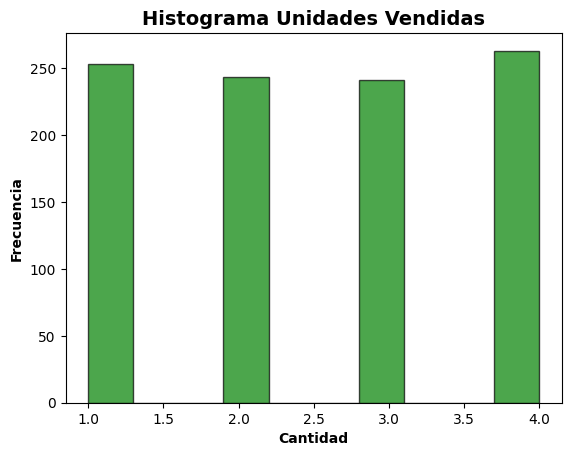

In [25]:
# Se crea gráfico histograma de la columna Unidades Vendidas.
plt.hist(df["quantity"], bins=10, color="green", edgecolor="black", alpha=0.7)
plt.title("Histograma Unidades Vendidas", fontsize=14, fontweight='bold')
plt.xlabel("Cantidad", fontweight='bold')
plt.ylabel("Frecuencia", fontweight='bold')
plt.show()

#### Cantidad de unidades vendidas en el rango de 1.0 a 4.0
#### Hay una leve diferencia de las cantidades de unidades vendidas, en los extremos, comparadas con rango del medio.

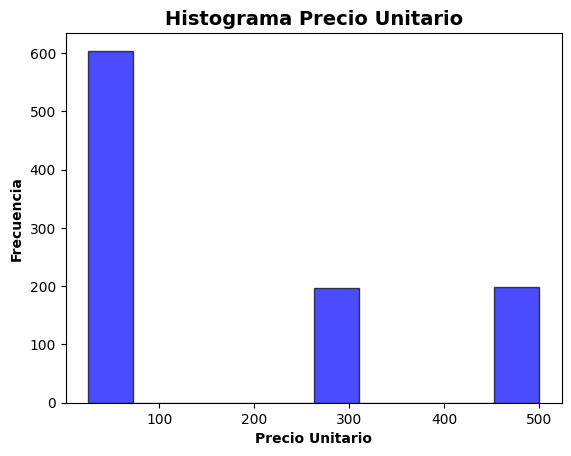

In [26]:
# Se crea gráfico histograma de la columna Precio por unidad.
plt.hist(df["price_per_unit"], bins=10, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histograma Precio Unitario", fontsize=14, fontweight='bold')
plt.xlabel("Precio Unitario", fontweight='bold')
plt.ylabel("Frecuencia", fontweight='bold')
plt.show()

#### Gran cantidad de transacciones con el precio mínimo con extremadamente alta frecuencia.
#### Transacciones con precio en el rango de 300 y 500 con frecuencias menores

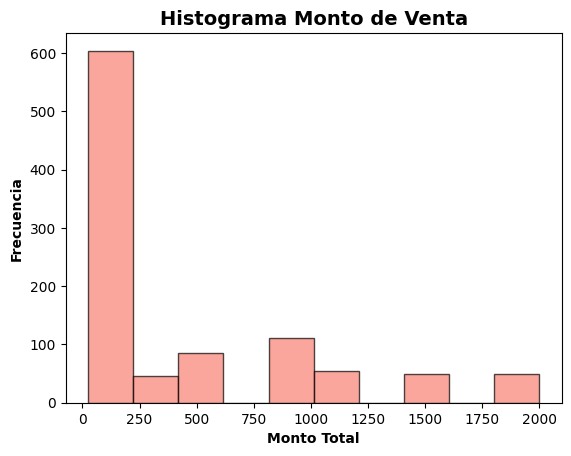

In [27]:
# Se crea gráfico histograma de la columna Monto Total.
plt.hist(df["total_amount"], bins=10, color="salmon", edgecolor="black", alpha=0.7)
plt.title("Histograma Monto de Venta", fontsize=14, fontweight='bold')
plt.xlabel("Monto Total", fontweight='bold')
plt.ylabel("Frecuencia", fontweight='bold')
plt.show()

#### Se ve una elevado numero de transacciones con un monto de venta mínimo y una muy alta frecuencia.
#### Las ventas restantes se encuentran en el rango de 250 y 2000 con una baja frecuencia solo pasando las 100

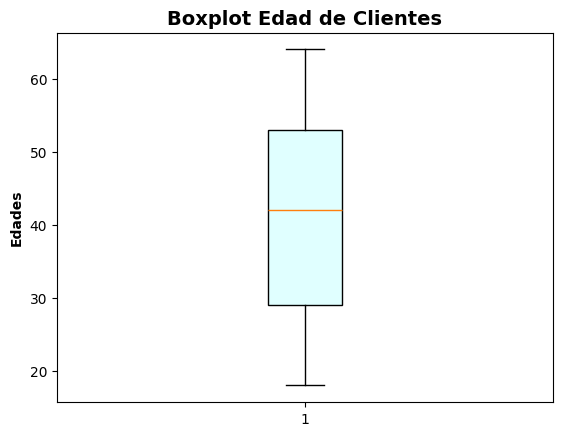

In [28]:
# Se crea gráfico Boxplot de la columna Edad.
prop_caja = dict(facecolor='lightcyan')
plt.boxplot(df['age'], patch_artist=True, boxprops=prop_caja)
plt.title("Boxplot Edad de Clientes", fontsize=14, fontweight='bold')
plt.ylabel("Edades", fontweight='bold')
plt.show()

#### La mediana se encuentra levemente sobre 40, el 50% de edades esta bajo esta  cifra
#### Bigotes normales con dispersíon de datos

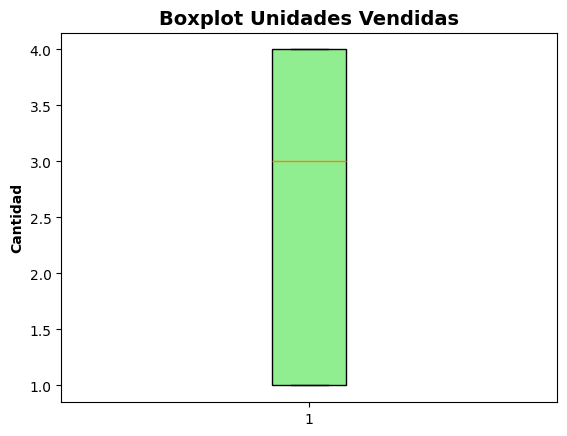

In [29]:
# Se crea gráfico Boxplot de columna Unidades Vendidas
prop_caja = dict(facecolor="lightgreen")
plt.boxplot(df["quantity"], patch_artist=True, boxprops=prop_caja)
plt.title("Boxplot Unidades Vendidas", fontsize=14, fontweight='bold')
plt.ylabel("Cantidad", fontweight='bold')
plt.show()

#### La mediana se encuentra en el valor 3.
#### hay una baja dispersion de datos.
#### hay ausencia de valores extremos.
#### Los datos estan altamente concentrados.

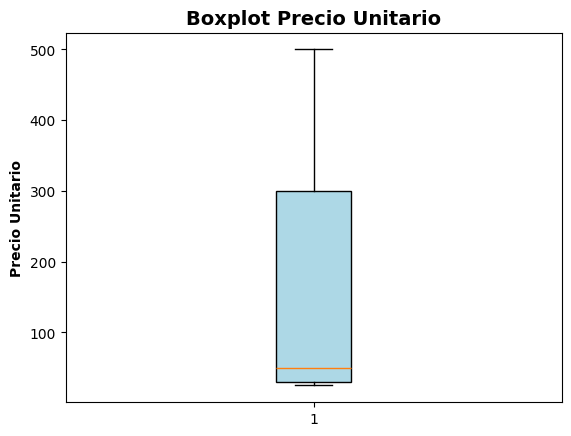

In [30]:
# Se crea gráfico Boxplot de columna Precio Unitario
prop_caja = dict(facecolor="lightblue")
plt.boxplot(df["price_per_unit"], patch_artist=True, boxprops=prop_caja)
plt.title("Boxplot Precio Unitario", fontsize=14, fontweight='bold')
plt.ylabel("Precio Unitario", fontweight='bold')
plt.show()

#### Los valores mas bajos estan más agrupados con menos dispersión.
#### El bigote superior indica una mayor dispersión o variabilidad en los valores más altos de la distribución.
####  La mediana cerca del bigote inferior, entre el rango de 0 a 100, indica que la mitad de los datos son menores que ese valor, y la otra mitad es mayor, pero con una concentración mayor hacia los valores más bajos.


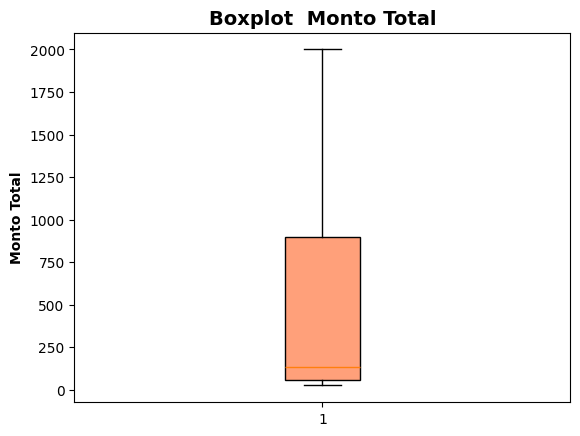

In [31]:
# se crea gráfico Boxplot de columna Monto Total
prop_caja = dict(facecolor="lightsalmon")
plt.boxplot(df["total_amount"], patch_artist=True, boxprops=prop_caja)
plt.title("Boxplot  Monto Total", fontsize=14, fontweight='bold')
plt.ylabel("Monto Total", fontweight='bold')
plt.show()

#### Los valores mas bajos estan más agrupados con menos dispersión.
#### El bigote superior mas largo hasta 2000, indica una mayor dispersión o variabilidad en los valores más altos de la distribución.
####  La mediana cerca del bigote inferior entre 0 y 250, indica que la mitad de los datos son menores que ese valor, y la otra mitad es mayor, pero con una concentración mayor hacia los valores más bajos.

* Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

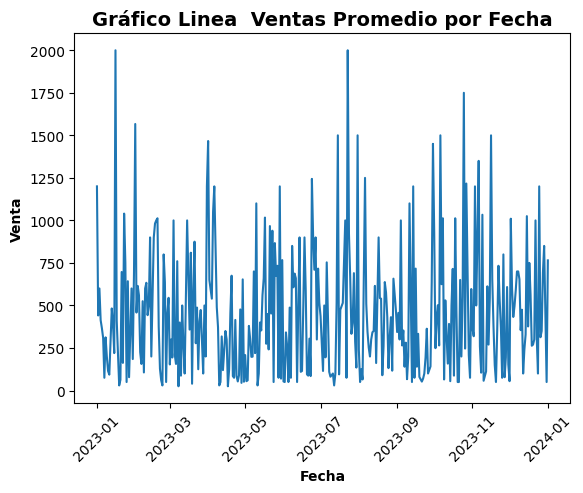

In [32]:
# Se aplica groupby para agrupar Edad por el promedio de Monto Total de venta.
# Se resetea los indices.
df_fil = df.groupby(df["date"])["total_amount"].mean().round(2).reset_index()

# Se crea gráfico de linea de Promedio Monto total por Fecha.
plt.plot(df_fil["date"], df_fil["total_amount"])
plt.title("Gráfico Linea  Ventas Promedio por Fecha", fontsize=14, fontweight='bold')
plt.xlabel("Fecha", fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Venta", fontweight='bold')
# Mostrar.
plt.show()

#### la mayoria de los montos de ventas promedio estan concentradao en el rango 100 a 1000, con algunos extremos que llegan hasta el valor 2000

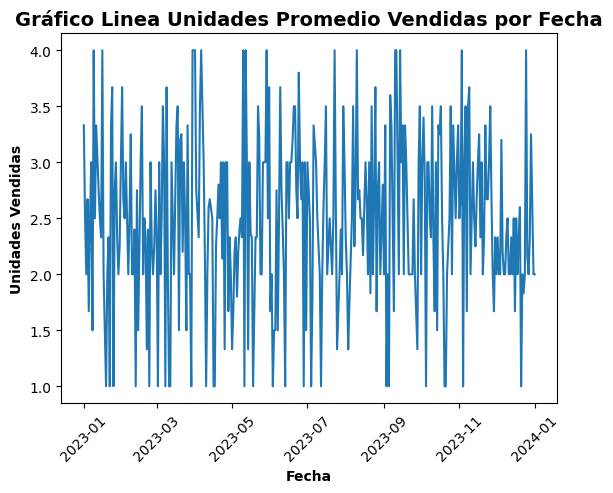

In [33]:
# Se aplica groupby para agrupar Promedio de Unidades Vendidas por Fecha.
df_fil = df.groupby(df["date"])["quantity"].mean().round(2).reset_index()

# Se crea gráfico de linea de Promdio Unidades Vendidas por Fecha.
plt.plot(df_fil["date"], df_fil["quantity"])
plt.title("Gráfico Linea Unidades Promedio Vendidas por Fecha", fontsize=14, fontweight='bold')
plt.xlabel("Fecha", fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Unidades Vendidas", fontweight='bold')
# Mostrar.
plt.show()

#### Los promedios de las cantidades de unidades vendidas fluctuan en el rango de 1.0 a 4.0, con una mayor concentración de cantidad de unidades vendidas entre 1.5 y 3.5.

In [34]:
categorias = df["product_category"].unique()
print(categorias)

['Beauty' 'Clothing' 'Electronics']


/tmp/ipython-input-35-145081139.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(df_categoria0["date"].dt.date, rotation=45)
/tmp/ipython-input-35-145081139.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df_categoria1["date"].dt.date, rotation=45)
/tmp/ipython-input-35-145081139.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(df_categoria2["date"].dt.date, rotation=45)


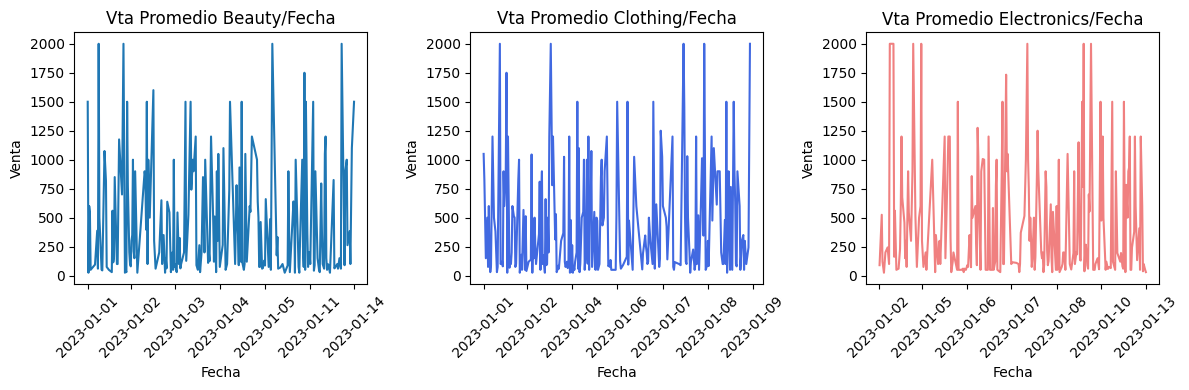

In [35]:
# Se agrupa por Fecha y categoria de producto y se calcula el promedio de ventas.

# Se crea graficos de linea en subplot
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
df_grupo = df.groupby(["date", "product_category"])["total_amount"].mean().reset_index()
categoria = df_grupo["product_category"].unique()

df_categoria0 = df_grupo[df_grupo["product_category"] == categoria[0]]
axs[0].plot(df_categoria0["date"], df_categoria0["total_amount"])
axs[0].set_title(f"Vta Promedio {categoria[0]}/Fecha")
axs[0].set_xlabel("Fecha")
axs[0].set_xticklabels(df_categoria0["date"].dt.date, rotation=45)
axs[0].set_ylabel("Venta")

df_categoria1 = df_grupo[df_grupo["product_category"] == categoria[1]]
axs[1].plot(df_categoria1["date"], df_categoria1["total_amount"], color='royalblue')
axs[1].set_title(f"Vta Promedio {categoria[1]}/Fecha")
axs[1].set_xlabel("Fecha")
axs[1].set_xticklabels(df_categoria1["date"].dt.date, rotation=45)
axs[1].set_ylabel("Venta")

df_categoria2 = df_grupo[df_grupo["product_category"] == categoria[2]]
axs[2].plot(df_categoria2["date"], df_categoria2["total_amount"], color='lightcoral')
axs[2].set_title(f"Vta Promedio {categoria[2]}/Fecha")
axs[2].set_xlabel("Fecha")
axs[2].set_xticklabels(df_categoria2["date"].dt.date, rotation=45)
axs[2].set_ylabel("Venta")

plt.tight_layout()
plt.show()

#### La distribución de montos de ventas, similar en los tres gráficos, con algunos altos por fecha sobre el valor 2000.  

* Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

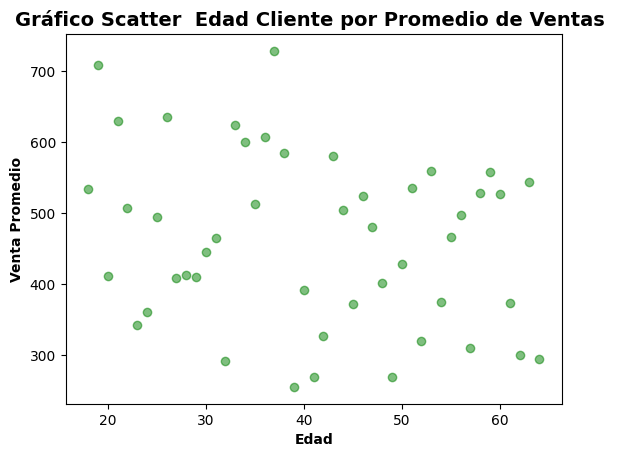

In [36]:
# Se agrupa por Edad y categoria de producto y se calcula el promedio de ventas.
df_fil = df.groupby(["age"])["total_amount"].mean().reset_index()

# Grafico Scatter que muestra correlacion de Edad Clientes  y promedio de Venta
plt.scatter(df_fil["age"], df_fil["total_amount"], color='green', alpha=0.5 )

plt.title("Gráfico Scatter  Edad Cliente por Promedio de Ventas ", fontsize=14, fontweight='bold')
plt.xlabel("Edad", fontweight='bold')
plt.ylabel("Venta Promedio", fontweight='bold')
plt.show()

#### Hay una dispersión reducida en extremos de edad , entre 20 y 30 y mayores de 60,  esto se reduce que hay una menor variabilidad en los promedios de montos de ventas.
#### Hay una maxima dispersión en tre 40 y 50 años.
#### Valores dispersos entre 30 y 50 años.
#### Entre 20 y 40 años ventas reducidas y extremadamente altas.

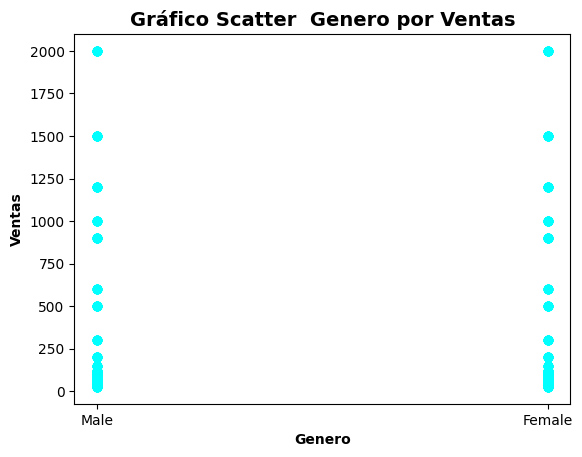

In [37]:
# Grafico Scatter que muestra correlacion de Edad Clientes  y Ventas
plt.scatter(df["gender"], df["total_amount"], color='cyan', alpha=0.5 )

plt.title("Gráfico Scatter  Genero por Ventas", fontsize=14, fontweight='bold')
plt.xlabel("Genero", fontweight='bold')
plt.ylabel("Ventas", fontweight='bold')
plt.show()

#### Hay dos concentraciones claras de ventas.
#### Entre 250 y 750, posibles Ventas cotidianas.
#### Entre 1250 y 1750 compras significativas.
#### Hay una mayor densidad en el rangos de 0 a 250, mayoria de transacciones para hombres y mujeres.

* Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

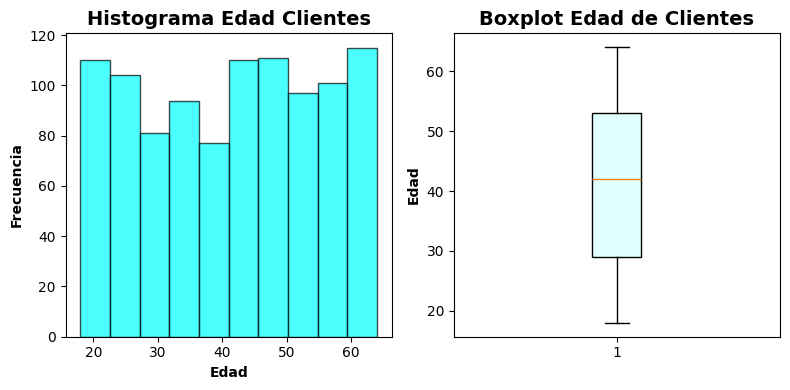

In [38]:
# Se crea graficos en subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Se crea gráfico histograma de la columna Edad.
axs[0].hist(df["age"], bins=10, color="cyan", edgecolor="black", alpha=0.7)
axs[0].set_title("Histograma Edad Clientes", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Edad", fontweight='bold')
axs[0].set_ylabel("Frecuencia", fontweight='bold')

# Se crea gráfico Boxplot de la columna Edad.
prop_caja = dict(facecolor='lightcyan')
axs[1].boxplot(df['age'], patch_artist=True, boxprops=prop_caja)
axs[1].set_title("Boxplot Edad de Clientes", fontsize=14, fontweight='bold')
axs[1].set_ylabel("Edad", fontweight='bold')

plt.tight_layout()
plt.show()


#### Se verifica que en el gráfico de histograma hay una alta frecuencia de clientes entre el rango de 20 a 30 años y en el extremo derecho, gran cantidad de clientes en el rango de 40 a 60 años con una alta frecuencia.
#### El gráfico de boxplot se encuentra la mediana cerca de los 35 años, donde se encuentra distribuido el 50 % de cliente.
#### Los bigotes son similares en longitud, con una menor dispersión de datos.
#### Sin outliers

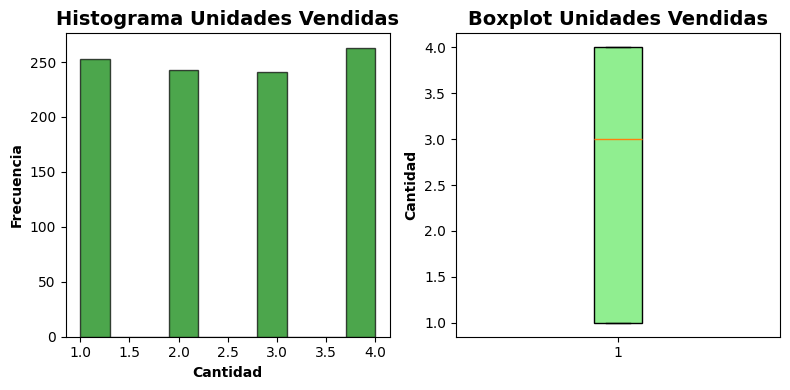

In [39]:
# Se crea graficos en subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Se crea gráfico histograma de la columna Unidades Vendidas.
axs[0].hist(df["quantity"], bins=10, color="green", edgecolor="black", alpha=0.7)
axs[0].set_title("Histograma Unidades Vendidas", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Cantidad", fontweight='bold')
axs[0].set_ylabel("Frecuencia", fontweight='bold')

# Se crea gráfico Boxplot de columna Unidades Vendidas
prop_caja = dict(facecolor="lightgreen")
axs[1].boxplot(df["quantity"], patch_artist=True, boxprops=prop_caja)
axs[1].set_title("Boxplot Unidades Vendidas", fontsize=14, fontweight='bold')
axs[1].set_ylabel("Cantidad", fontweight='bold')

plt.tight_layout()
plt.show()


#### El histograma indica que la mayoría de las unidades vendidas, en el rango de 1.0 a 4.0, alcanzan una frecuencia máxima de 250, mostrando una alta concentración de ventas en esos intervalos.
#### El boxplot indica que la mediana se encuentra justo en 3 unidades.
#### Los bigotes indica que no hay dispersíón de los datos.
#### Sin puntos extremos fuera de la mayoria.



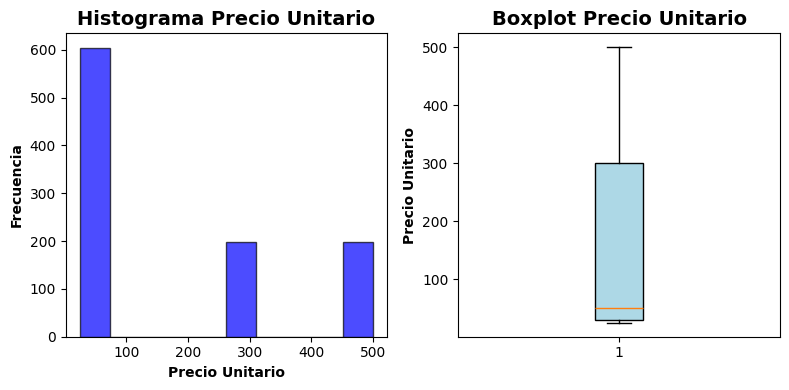

In [40]:
# Se crea graficos en subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Se crea gráfico histograma de la columna Precio por unidad.
axs[0].hist(df["price_per_unit"], bins=10, color="blue", edgecolor="black", alpha=0.7)
axs[0].set_title("Histograma Precio Unitario", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Precio Unitario", fontweight='bold')
axs[0].set_ylabel("Frecuencia", fontweight='bold')

# Se crea gráfico Boxplot de columna Precio Unitario
prop_caja = dict(facecolor="lightblue")
axs[1].boxplot(df["price_per_unit"], patch_artist=True, boxprops=prop_caja)
axs[1].set_title("Boxplot Precio Unitario", fontsize=14, fontweight='bold')
axs[1].set_ylabel("Precio Unitario", fontweight='bold')

plt.tight_layout()
plt.show()



#### El Histograma inidica que hay una gran cantidad de transacciones de productos con precio minimo menores a 100, el resto de transacciones fluctuan entre el precio de 300 y 500.
#### El boxplot indica que la mediana se encuentra por debajo del precio 100 y la caja se encuentra muy cerca del mínimo.
#### El bigote superior, cerca del precio 500, indica dispersión en los datos.
#### los datos estan concentrado cerca del bigote inferior.



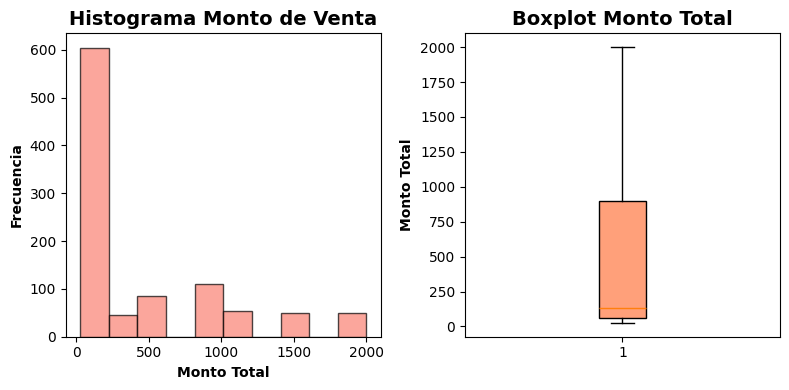

In [41]:
# Se crea graficos en subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Se crea gráfico histograma de la columna Monto Total.
axs[0].hist(df["total_amount"], bins=10, color="salmon", edgecolor="black", alpha=0.7)
axs[0].set_title("Histograma Monto de Venta", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Monto Total", fontweight='bold')
axs[0].set_ylabel("Frecuencia", fontweight='bold')

# se crea gráfico Boxplot de columna Monto Total
prop_caja = dict(facecolor="lightsalmon")
axs[1].boxplot(df["total_amount"], patch_artist=True, boxprops=prop_caja)
axs[1].set_title("Boxplot Monto Total", fontsize=14, fontweight='bold')
axs[1].set_ylabel("Monto Total", fontweight='bold')

plt.tight_layout()
plt.show()


#### El histograma indica gran cantidad de transacciones con monto  de venta mínimo con alta frecuencia, las de más transacciones se encuentran en rango bajo de frecuencia, hay algunas transacciones con precios muy cerca de 2000.
#### El boxplot indica que la mediana se encuentra entre el rango de 0 a 250, donde se encuentra distribuido la mayor cantidad de transacciones,
#### El bigote superior extremadamente largo situandose cerca de 2000 con una mayor dispersión de los datos.


#### Conclusión final

* Se concluye que se encuentra un exceso de productos economicos.
* Hay una alta dependencia de productos economicos.
* Las ventas estan divididas en productos básicos y premium.